In [1]:
import pandas as pd
import nibabel as nib
import numpy as np
import os
path="/Users/ciro/Documents/Brain Tumor Datasets"
file_path=path
# Function to load .nii image
def load_nii_image(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

# Function to get all images for a patient
def get_patient_images(patient_id, year, grade, base_dir):
    if year in ['2018', '2019']:
        grade_dir = 'HGG' if grade == 'HGG' else 'LGG'
        folder_path = os.path.join(base_dir, year, grade_dir, patient_id)
    else:
        folder_path = os.path.join(base_dir, year, patient_id)
    
   # modalities = ['flair', 'seg', 't1', 't1ce', 't2']
    modalities = ['flair']
    images = {}
    
    for modality in modalities:
        file_name = f"{patient_id}_{modality}.nii"
        file_path = os.path.join(folder_path, file_name)
        if os.path.exists(file_path):
            images[modality] = load_nii_image(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return images

# Base directory of the dataset
base_dir = path

# Load the name mapping file
name_mapping_path = path+'/2020/name_mapping.csv'
name_mapping_df = pd.read_csv(name_mapping_path)

# List to hold all patient data
all_patient_data = []
sampled_name_mapping_df = name_mapping_df.sample(50, random_state=42)
# Iterate over each row in the DataFrame
for idx, row in sampled_name_mapping_df.iterrows():
    print(f"Processing patient {idx+1}/{len(name_mapping_df)}")
    
    patient_data = {
        'Grade': row['Grade'],
        'Images': []
    }
    
    for year in ['2018', '2019', '2020']:
        patient_id = row[f'BraTS_{year}_subject_ID']
        if pd.isna(patient_id):
            continue
        images = get_patient_images(patient_id, year, row['Grade'], base_dir)
        patient_data['Images'].append(images)
    
    all_patient_data.append(patient_data)

print("Finished processing all patients.")

Processing patient 327/369
Processing patient 34/369
Processing patient 16/369
Processing patient 346/369
Processing patient 58/369
Processing patient 240/369
Processing patient 77/369
Processing patient 120/369
Processing patient 306/369
Processing patient 127/369
Processing patient 234/369
Processing patient 40/369
Processing patient 154/369
Processing patient 56/369
Processing patient 156/369
Processing patient 279/369
Processing patient 1/369
Processing patient 232/369
Processing patient 334/369
Processing patient 102/369
Processing patient 10/369
Processing patient 181/369
Processing patient 73/369
Processing patient 238/369
Processing patient 256/369
Processing patient 138/369
Processing patient 226/369
Processing patient 195/369
Processing patient 194/369
Processing patient 366/369
Processing patient 26/369
Processing patient 109/369
Processing patient 43/369
Processing patient 357/369
Processing patient 289/369
Processing patient 115/369
Processing patient 64/369
Processing pat

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Conv3D(32, kernel_size=(3, 3, 3), activation='relu')(inputs)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    x = Conv3D(64, kernel_size=(3, 3, 3), activation='relu')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    x = Conv3D(128, kernel_size=(3, 3, 3), activation='relu')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification (HGG or LGG)
    
    model = Model(inputs, outputs)
    return model

input_shape = (128, 128, 128, 1)  # Example input shape, needs adjustment based on actual data
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

/Users/ciro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 128,  │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 126, 126, 126,  │           896 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 63, 63, 63, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 61, 61, 61, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 30, 30, 30, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 28, 28, 28,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 14, 14, 14,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 351232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   179,831,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,109,377 (687.06 MB)

 Trainable params: 180,109,377 (687.06 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:

X = []  # Placeholder for image data
y = []  # Placeholder for labels

for patient_data in all_patient_data:
    for image_set in patient_data['Images']:
        flair_image = image_set['flair']  # Using 'flair' image as example, preprocess as needed
        X.append(flair_image)
        y.append(1 if patient_data['Grade'] == 'HGG' else 0)

X = np.array(X)
y = np.array(y)

# Normalize images
X = X / np.max(X)




In [4]:
# Custom callback to calculate metrics
from tensorflow.keras.callbacks import Callback, EarlyStopping
class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_val_pred = (self.model.predict(self.validation_data[0]) >= 0.5).astype(int).flatten()
        y_val_true = self.validation_data[1]
        
        accuracy = accuracy_score(y_val_true, y_val_pred)
        precision = precision_score(y_val_true, y_val_pred)
        recall = recall_score(y_val_true, y_val_pred)
        f1 = f1_score(y_val_true, y_val_pred)
        
        print(f'\nEpoch {epoch + 1}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')

In [7]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  
cnn_model.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_val, y_val) )


Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1447s 102s/step - accuracy: 0.9014 - loss: 0.4138 - val_accuracy: 0.9630 - val_loss: 0.1989
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 2580s 190s/step - accuracy: 0.8253 - loss: 0.4972 - val_accuracy: 0.9630 - val_loss: 0.3277
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1900s 138s/step - accuracy: 0.8638 - loss: 0.4191 - val_accuracy: 0.9630 - val_loss: 0.1860


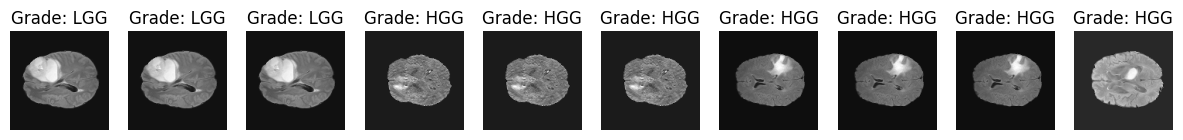

In [8]:
import matplotlib.pyplot as plt

def plot_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1 )
        plt.imshow(X[i, :, :, 64], cmap='gray')  # Assuming middle slice for 3D images
        plt.title(f"Grade: {'HGG' if y[i] == 1 else 'LGG'}")
        plt.axis('off')
    plt.show()

# Plot some sample images
plot_sample_images(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


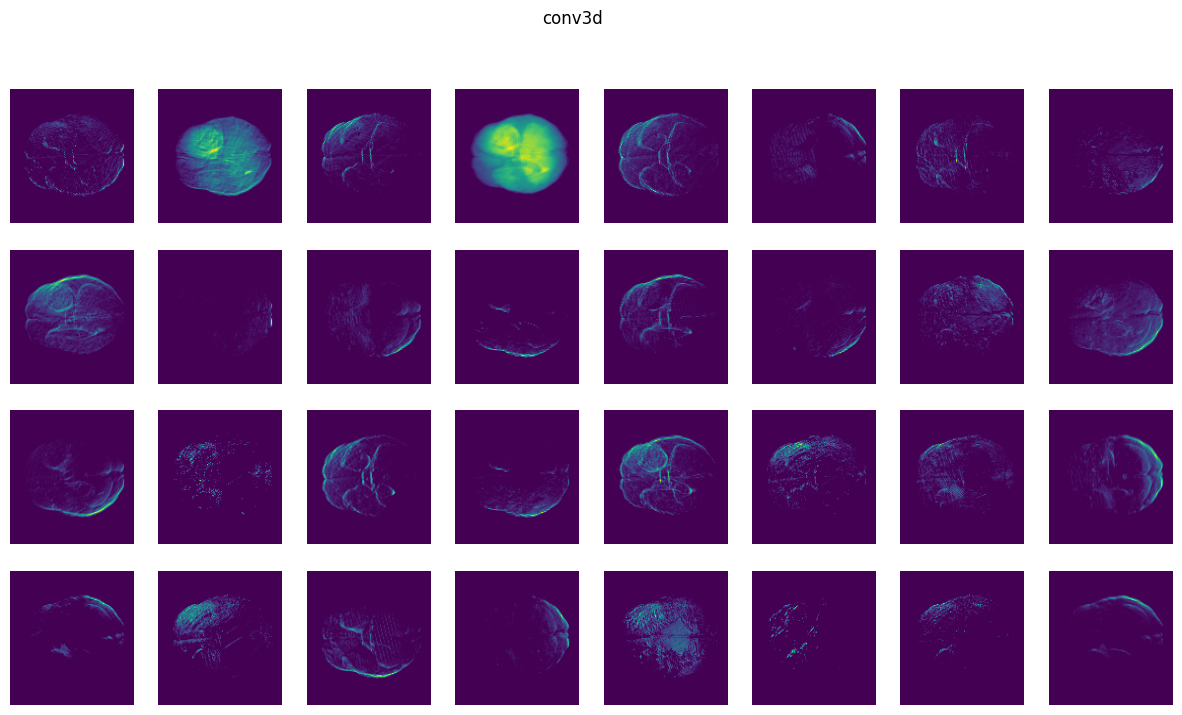

In [9]:
 
def plot_feature_maps(model, layer_name, image):
    # Create a model that will return feature maps for a given layer
    intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    feature_maps = intermediate_model.predict(np.expand_dims(image, axis=0))
    
    # Plot the feature maps
    num_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    num_cols = 8  # Number of columns for display
    num_rows = num_filters // num_cols if num_filters % num_cols == 0 else (num_filters // num_cols) + 1

    plt.figure(figsize=(15, num_rows * 2))
    for i in range(num_filters):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        feature_map = feature_maps[0, :, :, :, i]
        feature_map = np.mean(feature_map, axis=-1)  # Average over the depth dimension
        ax.imshow(feature_map, aspect='auto', cmap='viridis')
        ax.axis('off')
    plt.suptitle(layer_name)
    plt.show()

# Example usage: Plot feature maps from the first convolutional layer
plot_feature_maps(cnn_model, 'conv3d', X[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


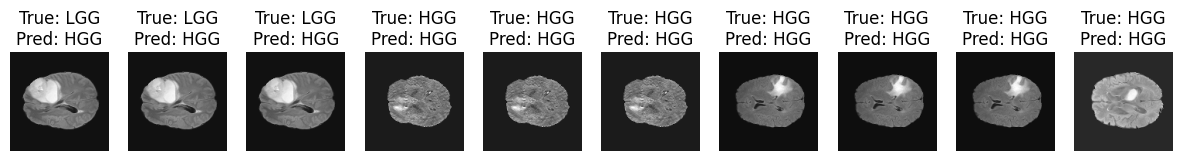

In [24]:
def plot_predictions(model, X, y, num_samples=10):
    predictions = model.predict(X[num_samples:num_samples+num_samples])
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i, :, :, 64], cmap='gray')  # Assuming middle slice for 3D images
        true_label = 'HGG' if y[i] == 1 else 'LGG'
        pred_label = 'HGG' if predictions[i] >= 0.5 else 'LGG'
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# Plot predictions for some sample images
plot_predictions(cnn_model, X, y)


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_val_pred = (cnn_model.predict(X_val) >= 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step
Accuracy: 0.9630
Precision: 0.9630
Recall: 1.0000
F1 Score: 0.9811
